In [ ]:
import pandas as pd
import numpy as np

##01 Data Colection



In [ ]:
class DataCollector:

    def __init__(self, filepath):
        self.filepath = filepath
        self.data = None

    def load_data(self):
        try:
            print(f"🔄 Menghubungkan ke sumber data: {self.filepath}...")
            self.data = pd.read_csv(self.filepath)
            print(f"✅ KONEKSI SUKSES! Data berhasil diambil.")
            print(f"📊 Total Data Petani: {self.data.shape[0]} orang")
            print(f"📝 Total Variabel Data: {self.data.shape[1]} kolom")
            return self.data
        except FileNotFoundError:
            print("❌ ERROR: File 'train.csv' tidak ditemukan!")
            return None

In [ ]:
file_path = 'data/loan.csv'


collector = DataCollector(file_path)
df = collector.load_data()

if df is not None:
    print("\n🔍 [PREVIEW] 5 Data Petani Pertama (Data Mentah):")
    display(df.head())

🔄 Menghubungkan ke sumber data: sample_data/history_debt.csv...
✅ KONEKSI SUKSES! Data berhasil diambil.
📊 Total Data Petani: 614 orang
📝 Total Variabel Data: 13 kolom

🔍 [PREVIEW] 5 Data Petani Pertama (Data Mentah):


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##02 Data Understanding .Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
class DataExplorer:
  def __init__(self,data):
    self.df = data.copy()

  def proxy_mapping(self):
    print("\n Mengubah label data ke konteks Pertanian...")
    mapping = {
        'ApplicantIncome' : 'pendapatan_panen',
        'CoapplicantIncome' : 'pendapatan_sampingan',
        'LoanAmount' : 'jumlah_pinjaman_kur',
        'Loan_Amount_Term' : 'durasi_pinjaman',
        'Credit_History' : 'riwayat_kredit_digital',
        'Property_Area' : 'Lokasi_lahan',
        'Loan_Status' : 'status_kelayakan'
    }
    self.df.rename(columns=mapping, inplace=True)
    if 'Loan_ID' in self.df.columns:
      self.df.drop(columns=['Loan_ID'],inplace=True)
    return self.df


  def check_data_quality(self):
    print("\n [1] cek kualitas data")
    print("-" * 40 )

    print("\n>> Jumlah Data Kosong (Missing value) :")
    missing = self.df.isnull().sum()
    print(missing[missing > 0])


    print ("\n>> Stastistik Deskriptif (Cek Anomali/Outlier):")
    display(self.df.describe())
    print("-" * 40)


  def univariate_analysis(self):
    print("\n [2] Univariate Analysis: distribusi & outlier")
    fig, ax = plt.subplots(1,3,figsize=(18, 5))

    sns.histplot(self.df['pendapatan_panen'],kde= True, ax=ax[0], color='green')
    ax[0].set_title('Distribusi Pendapatan Panen')

    sns.boxplot(y=self.df['jumlah_pinjaman_kur'], ax=ax[1], color='orange')
    ax[1].set_title('Deteksi Outlier: Jumlah Pinjaman')

    self.df['status_kelayakan'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[2], colors=['#66b3ff','#99ff99'])
    ax[2].set_title('Proporsi Kelayakan (Layak vs Tidak)')
    ax[2].set_ylabel('')
    plt.show()


  def bivariate_analysis(self):
    print("\n⚖️ [3] BIVARIATE ANALYSIS: Faktor Penentu Kelayakan")
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))


    sns.countplot(x='riwayat_kredit_digital', hue='status_kelayakan', data=self.df, ax=ax[0])
    ax[0].set_title('Pengaruh Riwayat Kredit (0=Buruk, 1=Baik)')


    sns.countplot(x='Lokasi_lahan', hue='status_kelayakan', data=self.df, ax=ax[1], palette='pastel')
    ax[1].set_title('Pengaruh Lokasi Lahan')
    plt.show()


  def multivariate_analysis(self):
    print("\n🔥 [4] MULTIVARIATE ANALYSIS: Heatmap Korelasi")
    plt.figure(figsize=(8, 6))


    df_corr = self.df.copy()

    df_corr['status_kelayakan'] = df_corr['status_kelayakan'].apply(lambda x: 1 if x == 'Y' else 0)
    numeric_df = df_corr.select_dtypes(include=['number'])


    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Peta Korelasi Antar Variabel (Dasar Bobot AHP)')
    plt.show()



 Mengubah label data ke konteks Pertanian...

 [1] cek kualitas data
----------------------------------------

>> Jumlah Data Kosong (Missing value) :
Gender                    13
Married                    3
Dependents                15
Self_Employed             32
jumlah_pinjaman_kur       22
durasi_pinjaman           14
riwayat_kredit_digital    50
dtype: int64

>> Stastistik Deskriptif (Cek Anomali/Outlier):


,pendapatan_panen,pendapatan_sampingan,jumlah_pinjaman_kur,durasi_pinjaman,riwayat_kredit_digital
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


----------------------------------------

 [2] Univariate Analysis: distribusi & outlier


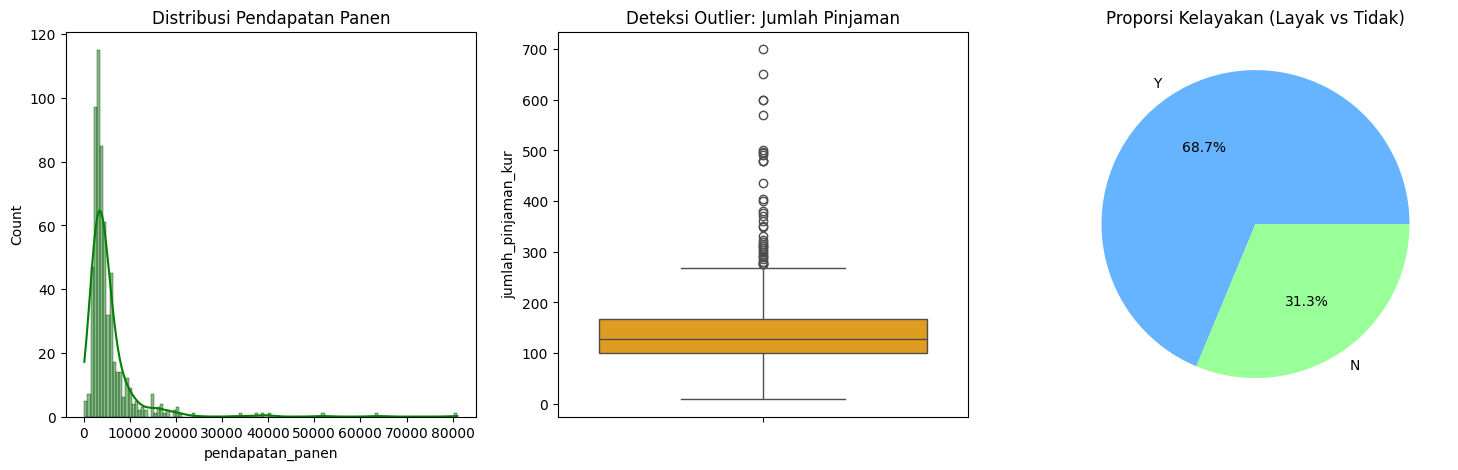


⚖️ [3] BIVARIATE ANALYSIS: Faktor Penentu Kelayakan


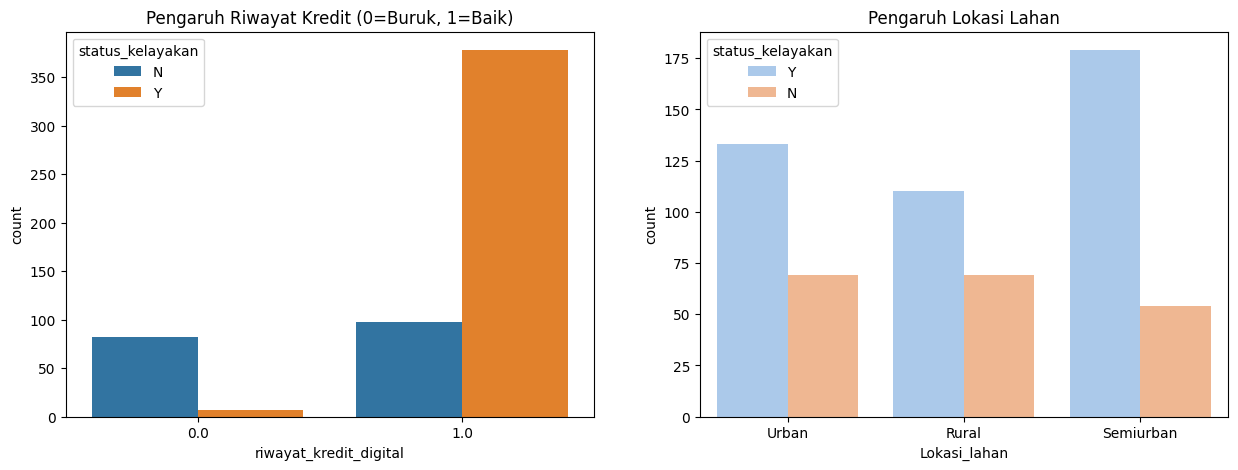


🔥 [4] MULTIVARIATE ANALYSIS: Heatmap Korelasi


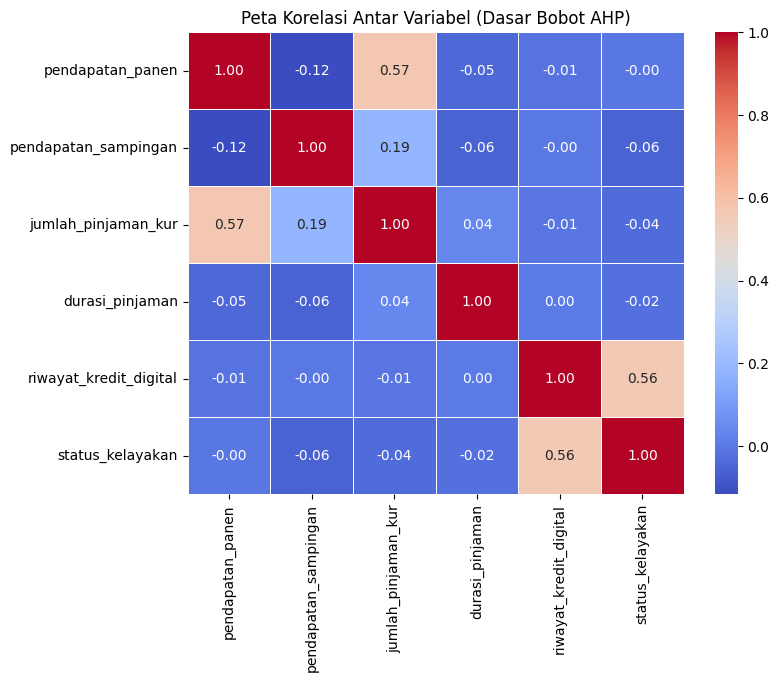

In [ ]:
explorer = DataExplorer(df)
df_eda = explorer.proxy_mapping()
explorer.check_data_quality()


explorer.univariate_analysis()
explorer.bivariate_analysis()
explorer.multivariate_analysis()

## 03 Data *Preprossecing*

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import numpy as np
import pandas as pd

class DataPreprocessor:
  def __init__(self,data):
    self.df = data.copy()
    self.label_encoders = {}
    self.scaler = MinMaxScaler()

  # 1.

  def handle_missing_values(self):

        print("\n🧹 [1] IMPUTASI: Mengisi data kosong...")

        nums = self.df.select_dtypes(include=[np.number]).columns
        cats = self.df.select_dtypes(exclude=[np.number]).columns


        for col in nums:
            if self.df[col].isnull().sum() > 0:
                val = self.df[col].median()

                self.df[col] = self.df[col].fillna(val)
                print(f"   -> Kolom '{col}' diisi dengan median: {val}")


        for col in cats:
            if self.df[col].isnull().sum() > 0:
                val = self.df[col].mode()[0]

                self.df[col] = self.df[col].fillna(val)
                print(f"   -> Kolom '{col}' diisi dengan modus: {val}")

        print("✅ Semua data kosong berhasil ditambal.")

  # 2.
  def encode_categorical(self):

        print("\n🔠 [2] ENCODING: Mengubah teks jadi angka...")


        cats = self.df.select_dtypes(include=['object']).columns

        for col in cats:
            le = LabelEncoder()
            self.df[col] = le.fit_transform(self.df[col])
            self.label_encoders[col] = le

        print(f"✅ Kolom yang diubah ke angka: {list(cats)}")

  #  3.

  def normalize_features(self):
        print("\n⚖️ [3] SCALING: Normalisasi skala data (0-1)...")


        target_col = 'status_kelayakan'
        features = [c for c in self.df.columns if c != target_col]

        self.df[features] = self.scaler.fit_transform(self.df[features])

        print("✅ Data berhasil dinormalisasi ke rentang 0 sampai 1.")
        return self.df







In [ ]:
preprocessor = DataPreprocessor(df_eda)

preprocessor.handle_missing_values()
preprocessor.encode_categorical()
df_final = preprocessor.normalize_features()

print("\n DATA FINAL :")
display(df_final.head())
print("\n>> Cek Data Kosong Terakhir:")
print(df_final.isnull().sum().sum())


🧹 [1] IMPUTASI: Mengisi data kosong...
   -> Kolom 'jumlah_pinjaman_kur' diisi dengan median: 128.0
   -> Kolom 'durasi_pinjaman' diisi dengan median: 360.0
   -> Kolom 'riwayat_kredit_digital' diisi dengan median: 1.0
   -> Kolom 'Gender' diisi dengan modus: Male
   -> Kolom 'Married' diisi dengan modus: Yes
   -> Kolom 'Dependents' diisi dengan modus: 0
   -> Kolom 'Self_Employed' diisi dengan modus: No
✅ Semua data kosong berhasil ditambal.

🔠 [2] ENCODING: Mengubah teks jadi angka...
✅ Kolom yang diubah ke angka: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Lokasi_lahan', 'status_kelayakan']

⚖️ [3] SCALING: Normalisasi skala data (0-1)...
✅ Data berhasil dinormalisasi ke rentang 0 sampai 1.

 DATA FINAL :


,Gender,Married,Dependents,Education,Self_Employed,pendapatan_panen,pendapatan_sampingan,jumlah_pinjaman_kur,durasi_pinjaman,riwayat_kredit_digital,Lokasi_lahan,status_kelayakan
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0,1
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1



>> Cek Data Kosong Terakhir:
0


###Menentukan BOBOT AHP

In [ ]:

import numpy as np
import pandas as pd

class AHPWeighting:
    def __init__(self):

        self.criteria = [
            'pendapatan_panen',
            'pendapatan_sampingan',
            'jumlah_pinjaman_kur',
            'durasi_pinjaman',
            'riwayat_kredit_digital',
            'lokasi_lahan'
        ]
        self.weights = None

    def get_pairwise_matrix(self):
        n = len(self.criteria)
        matrix = np.ones((n, n))



        matrix[0, 1] = 3.0
        matrix[0, 2] = 2.0
        matrix[0, 3] = 3.0
        matrix[0, 4] = 0.33
        matrix[0, 5] = 5.0

        matrix[1, 2] = 0.5
        matrix[1, 3] = 1.0
        matrix[1, 4] = 0.2
        matrix[1, 5] = 3.0


        matrix[2, 3] = 2.0
        matrix[2, 4] = 0.25
        matrix[2, 5] = 4.0


        matrix[3, 4] = 0.2
        matrix[3, 5] = 2.0


        matrix[4, 5] = 9.0

        for i in range(n):
            for j in range(i + 1, n):
                matrix[j, i] = 1 / matrix[i, j]

        return matrix

    def calculate_weights(self):
        print("\n⚖️ [AHP] Menghitung Bobot Prioritas Fitur...")
        matrix = self.get_pairwise_matrix()

        column_sums = matrix.sum(axis=0)
        normalized_matrix = matrix / column_sums

        self.weights = normalized_matrix.mean(axis=1)

        print("✅ Bobot AHP Berhasil Dihitung:")
        print("-" * 50)
        print(f"{'KRITERIA'.ljust(25)} | {'BOBOT'.ljust(10)} | RANK")
        print("-" * 50)

        indices = np.argsort(self.weights)[::-1]
        for rank, i in enumerate(indices):
            print(f"{self.criteria[i].ljust(25)} | {self.weights[i]:.4f}     | #{rank+1}")

        return self.weights

ahp_processor = AHPWeighting()
feature_weights = ahp_processor.calculate_weights()


⚖️ [AHP] Menghitung Bobot Prioritas Fitur...
✅ Bobot AHP Berhasil Dihitung:
--------------------------------------------------
KRITERIA                  | BOBOT      | RANK
--------------------------------------------------
riwayat_kredit_digital    | 0.4508     | #1
pendapatan_panen          | 0.2129     | #2
jumlah_pinjaman_kur       | 0.1370     | #3
pendapatan_sampingan      | 0.0840     | #4
durasi_pinjaman           | 0.0771     | #5
lokasi_lahan              | 0.0382     | #6


##04 Model selection




In [ ]:

import numpy as np
from collections import Counter

class HybridKNN:
    def __init__(self, k=5, weights=None):
        self.k = k
        self.weights = np.array(weights)
# 1
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
# 3
    def weighted_euclidean_distance(self, row1, row2):
        diff = row1 - row2
        sq_diff = diff ** 2
        weighted_sq_diff = self.weights * sq_diff
        dist = np.sqrt(np.sum(weighted_sq_diff))

        return dist

    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = [self._predict_single(x) for x in X_test]
        return np.array(predictions)

    def _predict_single(self, x_input):
        distances = []
        for i in range(len(self.X_train)):
            dist = self.weighted_euclidean_distance(x_input, self.X_train[i])
            distances.append((dist, self.y_train[i]))


        distances.sort(key=lambda tup: tup[0])

        k_neighbors = distances[:self.k]

        k_labels = [label for (_, label) in k_neighbors]

        vote_result = Counter(k_labels).most_common(1)[0][0]

        return vote_result


In [ ]:
class HybridModelBuilder:
    def __init__(self, data, ahp_weights, k_neighbors=15):
        self.df = data.copy()
        self.weights = np.array(ahp_weights)
        self.k = k_neighbors

        self.model = HybridKNN(k=self.k, weights=self.weights)

        self.ahp_features = [
            'pendapatan_panen', 'pendapatan_sampingan', 'jumlah_pinjaman_kur',
            'durasi_pinjaman', 'riwayat_kredit_digital', 'lokasi_lahan'
        ]

    def ensure_renaming(self):
        if 'Lokasi_lahan' in self.df.columns:
            self.df.rename(columns={'Lokasi_lahan': 'lokasi_lahan'}, inplace=True)

    def _native_train_test_split(self, X, y, test_size=0.2, random_state=42):
        X_arr = np.array(X)
        y_arr = np.array(y)

        n_samples = len(X_arr)
        indices = np.arange(n_samples)


        if random_state is not None:
            np.random.seed(random_state)
        np.random.shuffle(indices)


        n_test = int(n_samples * test_size)
        n_train = n_samples - n_test


        train_idx = indices[:n_train]
        test_idx = indices[n_train:]


        X_train, X_test = X_arr[train_idx], X_arr[test_idx]
        y_train, y_test = y_arr[train_idx], y_arr[test_idx]

        return X_train, X_test, y_train, y_test

    def split_and_train(self):
        print(f"\n🏗️ Membangun Model AHP-KNN (K={self.k})...")
        self.ensure_renaming()

        X = self.df[self.ahp_features]
        y = self.df['status_kelayakan']


        X_train, X_test, y_train, y_test = self._native_train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        print(f"   -> ✂️  Data dibagi: {len(X_train)} Latih, {len(X_test)} Uji.")

        self.model.fit(X_train, y_train)
        print("   -> ✅ Model  berhasil menyimpan data latih.")

        return self.model, X_test, y_test

###Hyperparameter tuning


🔬 [TUNING] Sedang mencari nilai K terbaik (1 sampai 20)...
------------------------------------------------------------
Nilai K    | Akurasi    | Status
------------------------------------------------------------

🏗️ Membangun Model AHP-KNN (K=1)...
   -> ✂️  Data dibagi: 492 Latih, 122 Uji.
   -> ✅ Model  berhasil menyimpan data latih.
K = 1      | 71.31%    | ⭐ (Rekor Baru!)

🏗️ Membangun Model AHP-KNN (K=3)...
   -> ✂️  Data dibagi: 492 Latih, 122 Uji.
   -> ✅ Model  berhasil menyimpan data latih.
K = 3      | 74.59%    | ⭐ (Rekor Baru!)

🏗️ Membangun Model AHP-KNN (K=5)...
   -> ✂️  Data dibagi: 492 Latih, 122 Uji.
   -> ✅ Model  berhasil menyimpan data latih.
K = 5      | 78.69%    | ⭐ (Rekor Baru!)

🏗️ Membangun Model AHP-KNN (K=7)...
   -> ✂️  Data dibagi: 492 Latih, 122 Uji.
   -> ✅ Model  berhasil menyimpan data latih.
K = 7      | 79.51%    | ⭐ (Rekor Baru!)

🏗️ Membangun Model AHP-KNN (K=9)...
   -> ✂️  Data dibagi: 492 Latih, 122 Uji.
   -> ✅ Model  berhasil menyimpan dat

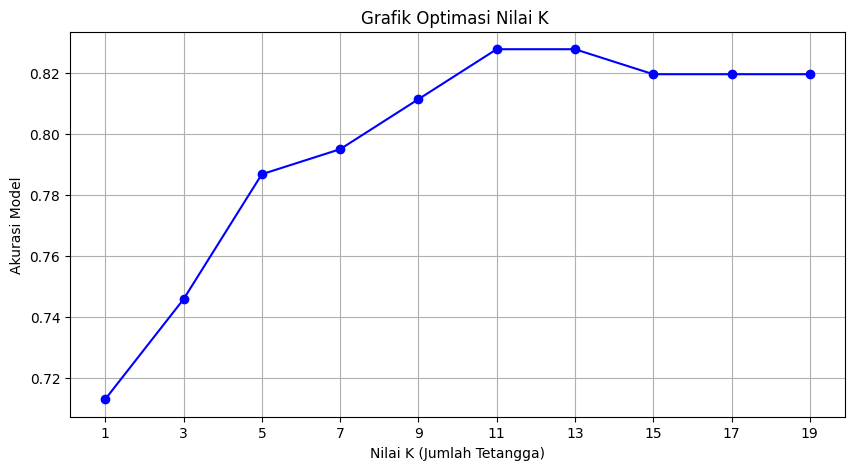

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

class ModelOptimizer:
    def __init__(self, data, ahp_weights):
        self.df = data
        self.weights = ahp_weights
        self.results = {}

    def find_optimal_k(self, max_k=20):
        print(f"\n🔬 [TUNING] Sedang mencari nilai K terbaik (1 sampai {max_k})...")
        print("-" * 60)
        print(f"{'Nilai K'.ljust(10)} | {'Akurasi'.ljust(10)} | Status")
        print("-" * 60)

        best_k = 0
        best_acc = 0

        for k in range(1, max_k+1, 2):

            builder = HybridModelBuilder(self.df, self.weights, k_neighbors=k)
            model, X_test, y_test = builder.split_and_train()

            y_pred = model.predict(X_test)

            jumlah_benar = np.sum(y_pred == y_test)
            total_data = len(y_test)

            acc = jumlah_benar / total_data

            self.results[k] = acc


            marker = ""
            if acc > best_acc:
                best_acc = acc
                best_k = k
                marker = "⭐ (Rekor Baru!)"

            print(f"K = {str(k).ljust(6)} | {acc:.2%}    | {marker}")

        print("-" * 60)
        print(f"\n✅ JUARA UMUM: K = {best_k} dengan Akurasi {best_acc:.2%}")
        return best_k, self.results

    def plot_results(self):
        k_values = list(self.results.keys())
        acc_values = list(self.results.values())

        plt.figure(figsize=(10, 5))
        plt.plot(k_values, acc_values, marker='o', linestyle='-', color='b')
        plt.title('Grafik Optimasi Nilai K ')
        plt.xlabel('Nilai K (Jumlah Tetangga)')
        plt.ylabel('Akurasi Model')
        plt.grid(True)
        plt.xticks(k_values)
        plt.show()

optimizer = ModelOptimizer(df_final, feature_weights)

k_terbaik, hasil_tuning = optimizer.find_optimal_k(max_k=20)
optimizer.plot_results()

In [ ]:

model_builder = HybridModelBuilder(data=df_final, ahp_weights=feature_weights, k_neighbors=11)
native_model, X_test_native, y_test_native = model_builder.split_and_train()


🏗️ Membangun Model AHP-KNN (K=11)...
   -> ✂️  Data dibagi: 492 Latih, 122 Uji.
   -> ✅ Model  berhasil menyimpan data latih.


##05 evaluasi Model

🚀 MEMBANGUN MODEL FINAL DENGAN PARAMETER TERBAIK (K=15)...

🏗️ Membangun Model AHP-KNN (K=15)...
   -> ✂️  Data dibagi: 492 Latih, 122 Uji.
   -> ✅ Model  berhasil menyimpan data latih.

📊 LAPORAN AKHIR (EVALUASI MODEL K=15)

🧮 [TEORI] Menghitung Confusion Matrix (TP, TN, FP, FN)...
   -> Jumlah Data Uji : 122
   [1] True Positive  (TP) : 85 (Tebakan Benar: Layak)
   [2] True Negative  (TN) : 15 (Tebakan Benar: Ditolak)
   [3] False Positive (FP) : 21 (Salah Tebak: Orang Jelek dibilang Bagus)
   [4] False Negative (FN) : 1 (Salah Tebak: Orang Bagus dibilang Jelek)

📊 [VISUAL] Confusion Matrix:


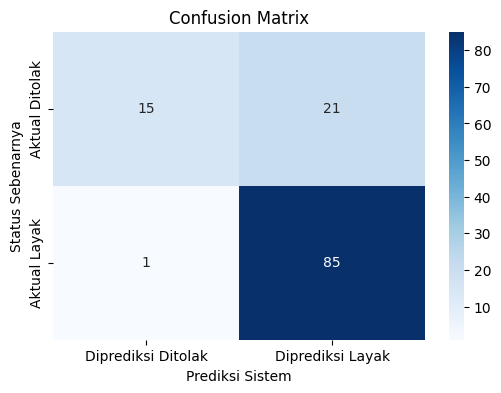


📏 [HASIL] Perhitungan Metrik Evaluasi:
🏆 AKURASI     : 81.97%
🎯 PRESISI     : 80.19%
🔍 RECALL      : 98.84%
🛡️ SPESIFISITAS: 41.67%
⚖️ F1-SCORE    : 88.54%
--------------------------------------------------
✅ KESIMPULAN AKHIR: Model Anda mencapai Akurasi 81.97% dan Spesifisitas 41.67%.
--------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class ManualEvaluator:
    def __init__(self, y_actual, y_predict):

        self.actual = y_actual.tolist() if hasattr(y_actual, 'tolist') else list(y_actual)
        self.pred = y_predict.tolist() if hasattr(y_predict, 'tolist') else list(y_predict)

        self.TP = 0
        self.TN = 0
        self.FP = 0
        self.FN = 0

    def calculate_confusion_matrix(self):
        print("\n🧮 [TEORI] Menghitung Confusion Matrix (TP, TN, FP, FN)...")
        for a, p in zip(self.actual, self.pred):
            if a == 1 and p == 1: self.TP += 1
            elif a == 0 and p == 0: self.TN += 1
            elif a == 0 and p == 1: self.FP += 1
            elif a == 1 and p == 0: self.FN += 1

        print(f"   -> Jumlah Data Uji : {len(self.actual)}")
        print(f"   [1] True Positive  (TP) : {self.TP} (Tebakan Benar: Layak)")
        print(f"   [2] True Negative  (TN) : {self.TN} (Tebakan Benar: Ditolak)")
        print(f"   [3] False Positive (FP) : {self.FP} (Salah Tebak: Orang Jelek dibilang Bagus)")
        print(f"   [4] False Negative (FN) : {self.FN} (Salah Tebak: Orang Bagus dibilang Jelek)")

    def visualize_confusion_matrix(self):
        print("\n📊 [VISUAL] Confusion Matrix:")
        cm = np.array([[self.TN, self.FP], [self.FN, self.TP]])
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Diprediksi Ditolak', 'Diprediksi Layak'],
                    yticklabels=['Aktual Ditolak', 'Aktual Layak'])
        plt.xlabel('Prediksi Sistem')
        plt.ylabel('Status Sebenarnya')
        plt.title('Confusion Matrix')
        plt.show()

    def calculate_metrics(self):
        print("\n📏 [HASIL] Perhitungan Metrik Evaluasi:")
        total = self.TP + self.TN + self.FP + self.FN if (self.TP + self.TN + self.FP + self.FN) > 0 else 0
        accuracy = (self.TP + self.TN) / total if total > 0 else 0
        precision = self.TP / (self.TP + self.FP) if (self.TP + self.FP) > 0 else 0
        recall = self.TP / (self.TP + self.FN) if (self.TP + self.FN) > 0 else 0
        specificity = self.TN / (self.TN + self.FP) if (self.TN + self.FP) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        print(f"🏆 AKURASI     : {accuracy:.2%}")
        print(f"🎯 PRESISI     : {precision:.2%}")
        print(f"🔍 RECALL      : {recall:.2%}")
        print(f"🛡️ SPESIFISITAS: {specificity:.2%}")
        print(f"⚖️ F1-SCORE    : {f1:.2%}")
        return accuracy, specificity


print("🚀 MEMBANGUN MODEL FINAL DENGAN PARAMETER TERBAIK (K=15)...")

final_builder = HybridModelBuilder(data=df_final, ahp_weights=feature_weights, k_neighbors=15)
model_juara, X_test_juara, y_test_juara = final_builder.split_and_train()

y_pred_final = model_juara.predict(X_test_juara)

print("\n📊 LAPORAN AKHIR (EVALUASI MODEL K=15)")
evaluator_final = ManualEvaluator(y_test_juara, y_pred_final)
evaluator_final.calculate_confusion_matrix()
evaluator_final.visualize_confusion_matrix()
acc_final, spec_final = evaluator_final.calculate_metrics()

print("-" * 50)
print(f"✅ KESIMPULAN AKHIR: Model Anda mencapai Akurasi {acc_final:.2%} dan Spesifisitas {spec_final:.2%}.")
print("-" * 50)